In [3]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_IN = df[df['job_country'] == 'India']

In [5]:
df_skills= df_IN.explode('job_skills')


In [6]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name = 'skill_count')

df_skills_count = df_skills_count.sort_values(by='skill_count', ascending= False)
df_skills_count

,job_skills,job_title_short,skill_count
1374,sql,Data Engineer,12993
1088,python,Data Engineer,11568
1089,python,Data Scientist,9248
1327,spark,Data Engineer,7157
103,aws,Data Engineer,6993
...,...,...,...
34,angular.js,Data Scientist,1
49,arch,Business Analyst,1
787,mlpack,Data Engineer,1
1679,yarn,Senior Data Scientist,1


In [7]:
job_titles =  df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

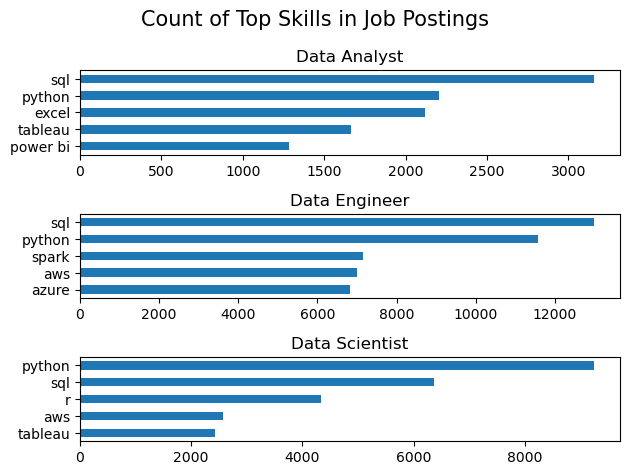

In [8]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title  in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head()
    df_plot.plot(kind = 'barh', x= 'job_skills', y='skill_count', ax=ax[i], title = job_title)
    ax[i].set_ylabel('')
    ax[i].invert_yaxis()
    ax[i].legend().remove()

fig.suptitle('Count of Top Skills in Job Postings', fontsize =15)
plt.tight_layout()
plt.show()


In [9]:
df_job_title_count = df_IN['job_title_short'].value_counts().reset_index(name='job_count')

In [10]:
df_skill_perc = pd.merge(df_skills_count, df_job_title_count, how = 'left', on ='job_title_short')

df_skill_perc['skill_percent'] = 100 * (df_skill_perc['skill_count'] / df_skill_perc['job_count']) 
df_skill_perc

,job_skills,job_title_short,skill_count,job_count,skill_percent
0,sql,Data Engineer,12993,19062,68.161788
1,python,Data Engineer,11568,19062,60.686182
2,python,Data Scientist,9248,13279,69.643798
3,spark,Data Engineer,7157,19062,37.545903
4,aws,Data Engineer,6993,19062,36.685552
...,...,...,...,...,...
1684,angular.js,Data Scientist,1,13279,0.007531
1685,arch,Business Analyst,1,1887,0.052994
1686,mlpack,Data Engineer,1,19062,0.005246
1687,yarn,Senior Data Scientist,1,2486,0.040225


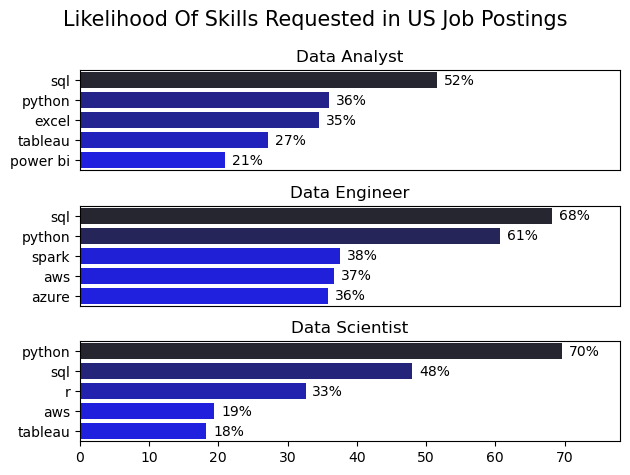

In [11]:
fig, ax = plt.subplots(len(job_titles),1)

for i, job_title  in enumerate(job_titles):
    df_plot = df_skill_perc[df_skill_perc['job_title_short'] == job_title].head()
    sns.barplot(data= df_plot, x= 'skill_percent', y= 'job_skills', ax = ax[i], hue='skill_count', palette = 'dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('')
    ax[i].legend().remove()
    ax[i].set_xlim(0,78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text( v+1, n, f'{v:.0f}%', va = 'center')

    if i != len(job_titles)-1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood Of Skills Requested in US Job Postings', fontsize =15)
plt.tight_layout()
plt.show()